In [2]:
import pandas as pd
import folium

# Carica il file CSV contenente latitudine, longitudine e valore medio
df = pd.read_csv('NO2Posizione.csv')  # Sostituisci 'DatiPulitiPM10.csv' con il nome del tuo file CSV

# Aggrega i dati per Comune e Provincia, prendendo il valore massimo per ogni gruppo
# Assicurati di mantenere le colonne 'latitudine' e 'longitudine'
df_max = df.groupby(['Comune', 'Provincia'], as_index=False).agg({
    'Valore_medio_annuo': 'max',
    'latitudine': 'first',
    'longitudine': 'first'
})

# Crea una mappa centrata su una posizione iniziale (ad esempio, il centro geografico del tuo dataset)
mappa = folium.Map(location=[df_max['latitudine'].mean(), df_max['longitudine'].mean()], zoom_start=12)

# Aggiungi cerchi per ogni riga del CSV con colore condizionale e popup
for index, row in df_max.iterrows():
    # Determina il colore del cerchio in base al valore della colonna 'Valore medio annuo'
    if row['Valore_medio_annuo'] < 40:
        colore = 'green'
    elif  40<= row['Valore_medio_annuo'] <= 80:
        colore = 'yellow'
    else:
        colore = 'red'
    
    # Crea il popup con le informazioni dal CSV
    popup_info = f"Comune: {row['Comune']}<br>Provincia: {row['Provincia']}<br>Valore Medio: {row['Valore_medio_annuo']}"

    # Aggiungi il cerchio alla mappa con il colore e il popup
    folium.Circle(
        location=[row['latitudine'], row['longitudine']],  # Posizione del cerchio
        radius=100,  # Raggio del cerchio in metri
        color=colore,  # Colore del bordo
        fill=True,  # Riempie il cerchio
        fill_color=colore,  # Colore di riempimento
        fill_opacity=0.4,  # Opacità del riempimento
        popup=popup_info  # Popup con le informazioni
    ).add_to(mappa)

# Salva la mappa come file HTML
html_file = 'mappa_con_popupNO2.html'
mappa.save(html_file)

# Stampa un messaggio di successo
print("Mappa generata e salvata come 'mappa_con_popupNO2.html'")



Mappa generata e salvata come 'mappa_con_popupNO2.html'


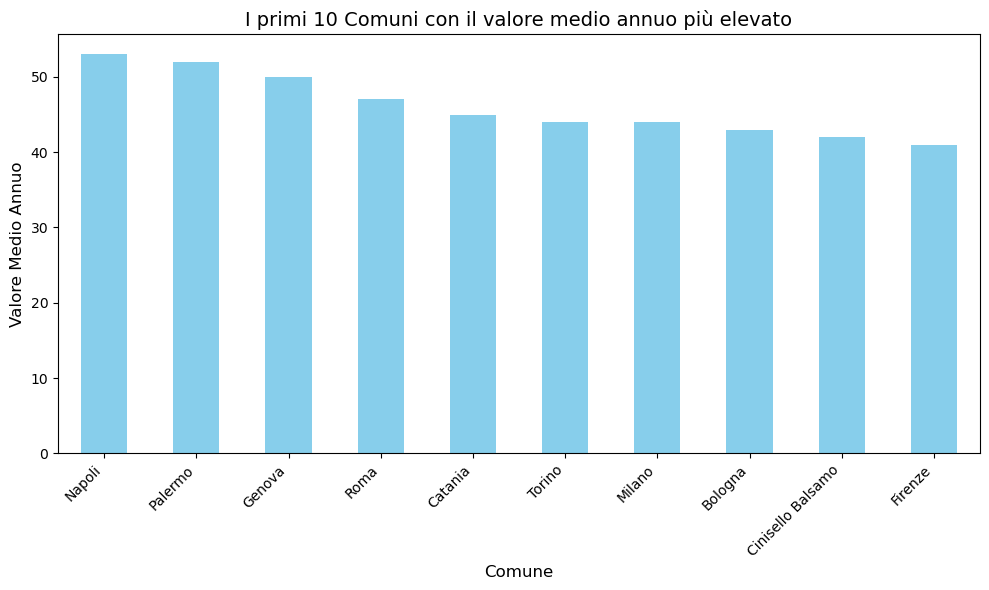

In [3]:
import matplotlib.pyplot as plt

# Carica il file CSV contenente i dati
df = pd.read_csv('NO2Posizione.csv')  # Sostituisci con il nome del tuo file CSV

# Raggruppa per Comune e prendi il valore massimo dei giorni di superamento della soglia
valoreMedio = df.groupby('Comune')['Valore_medio_annuo'].max()

# Ordina i Comuni per numero di giorni di superamento della soglia in ordine decrescente
valoreMedio = valoreMedio.sort_values(ascending=False)

# Seleziona i primi 10 Comuni con il maggiore numero di giorni di superamento della soglia
top_10_comuni = valoreMedio.head(10)


# Crea il grafico a barre
plt.figure(figsize=(10, 6))
top_10_comuni.plot(kind='bar', color='skyblue')

# Aggiungi titolo e etichette agli assi
plt.title('I primi 10 Comuni con il valore medio annuo più elevato', fontsize=14)
plt.xlabel('Comune', fontsize=12)
plt.ylabel('Valore Medio Annuo', fontsize=12)

# Ruota le etichette dell'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')
# Mostra il grafico
plt.tight_layout()
plt.show()

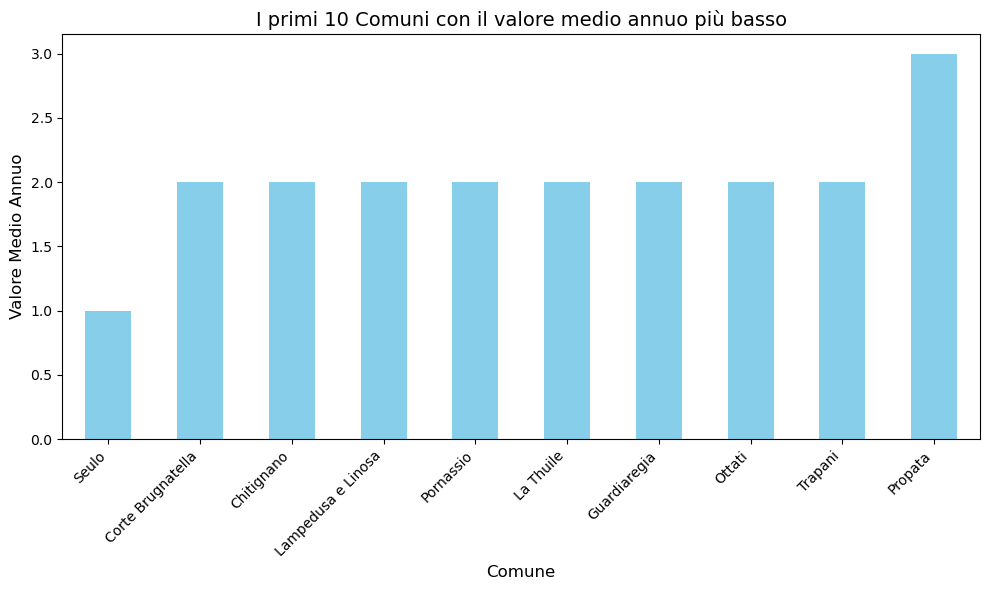

In [4]:

# Carica il file CSV contenente i dati
df = pd.read_csv('NO2Posizione.csv')  # Sostituisci con il nome del tuo file CSV

# Raggruppa per Comune e prendi il valore massimo dei giorni di superamento della soglia
valoreMedio = df.groupby('Comune')['Valore_medio_annuo'].max()

# Ordina i Comuni per numero di giorni di superamento della soglia in ordine decrescente
valoreMedio = valoreMedio.sort_values(ascending=True)

# Seleziona i primi 10 Comuni con il maggiore numero di giorni di superamento della soglia
top_10_comuni = valoreMedio.head(10)


# Crea il grafico a barre
plt.figure(figsize=(10, 6))
top_10_comuni.plot(kind='bar', color='skyblue')

# Aggiungi titolo e etichette agli assi
plt.title('I primi 10 Comuni con il valore medio annuo più basso', fontsize=14)
plt.xlabel('Comune', fontsize=12)
plt.ylabel('Valore Medio Annuo', fontsize=12)

# Ruota le etichette dell'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')
# Mostra il grafico
plt.tight_layout()
plt.show()



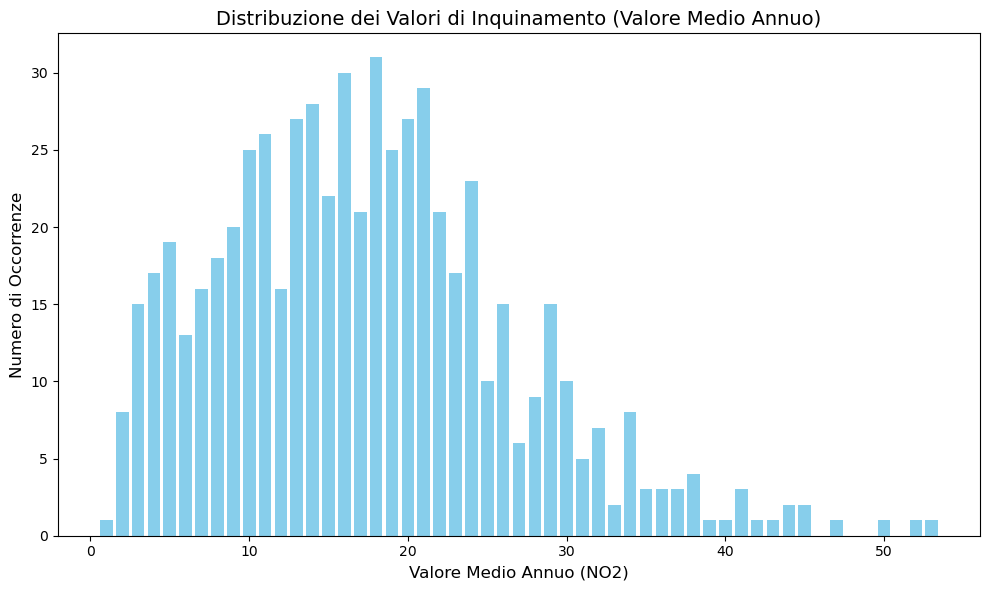

In [5]:
# Carica i dati dal file CSV
df = pd.read_csv('NO2Posizione.csv')

# Conteggia il numero di volte che ogni valore di 'Valore medio annuo' appare nel dataset
valore_counts = df['Valore_medio_annuo'].value_counts().sort_index()

# Crea un grafico a barre (istogramma)
plt.figure(figsize=(10,6))
plt.bar(valore_counts.index, valore_counts.values, color='skyblue')

# Aggiungi titolo e etichette agli assi
plt.title("Distribuzione dei Valori di Inquinamento (Valore Medio Annuo)", fontsize=14)
plt.xlabel("Valore Medio Annuo (NO2)", fontsize=12)
plt.ylabel("Numero di Occorrenze", fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()


